In [25]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from google.colab  import drive
drive.mount("/gdrive")
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [26]:
img_path = "/gdrive/My Drive/BitirmeTezi/Animals/"
labels=['bird','cat','dog']

In [27]:
img_height, img_width = (369,469)
image_size = (img_height, img_width)
batch_size = 32

train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
    img_path,
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=batch_size,
    image_size=image_size,
    shuffle=True,
    seed=1,
    validation_split=0.3,
    subset='both',
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)


Found 610 files belonging to 3 classes.
Using 427 files for training.
Using 183 files for validation.


In [28]:
for image_batch, labels_batch in train_ds:
  X_train = image_batch.numpy()
  y_train = labels_batch.numpy()
  break

In [30]:
X_train[4].dtype

dtype('float32')

In [31]:
y_train[6].dtype

dtype('int32')

In [32]:
y_train[6]

1

In [ ]:
class_names = train_ds.class_names
print(class_names)

['bird', 'cat', 'dog']


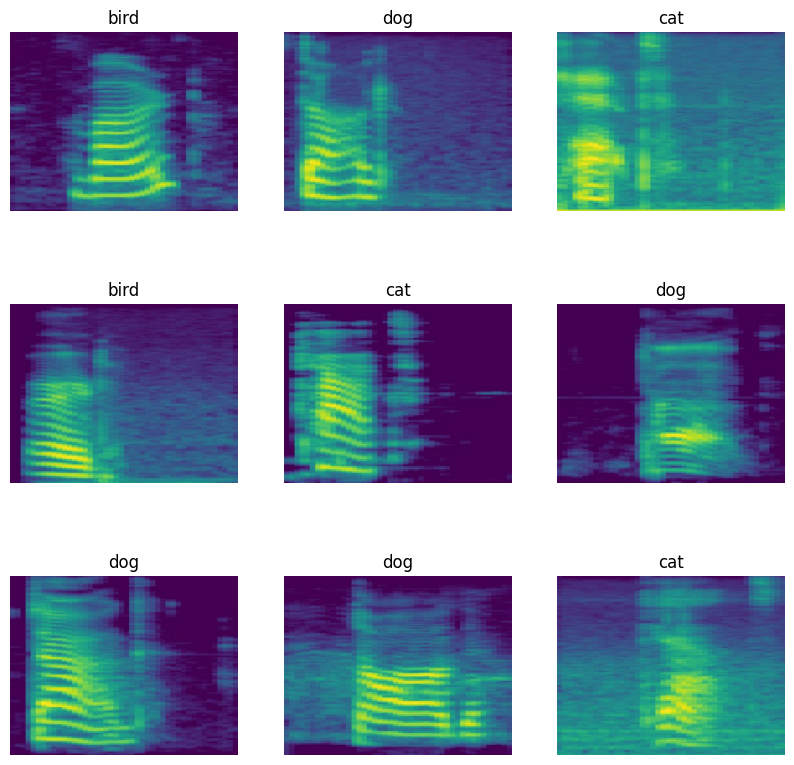

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(2):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:

"""
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break
"""

(32, 369, 469, 3)
(32,)


In [ ]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dropout(0.4),
  layers.Dense(num_classes,activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 369, 469, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 369, 469, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 184, 234, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 184, 234, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 92, 117, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 92, 117, 64)      

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs=9
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/9
14/14 [==============================] - 8s 220ms/step - loss: 1.5651 - accuracy: 0.3653 - val_loss: 0.9995 - val_accuracy: 0.6120
Epoch 2/9
14/14 [==============================] - 4s 218ms/step - loss: 0.9481 - accuracy: 0.5410 - val_loss: 0.7588 - val_accuracy: 0.7650
Epoch 3/9
14/14 [==============================] - 4s 219ms/step - loss: 0.6249 - accuracy: 0.7518 - val_loss: 0.4498 - val_accuracy: 0.8415
Epoch 4/9
14/14 [==============================] - 5s 260ms/step - loss: 0.4476 - accuracy: 0.8150 - val_loss: 0.3036 - val_accuracy: 0.9016
Epoch 5/9
14/14 [==============================] - 3s 161ms/step - loss: 0.3205 - accuracy: 0.8782 - val_loss: 0.2583 - val_accuracy: 0.9126
Epoch 6/9
14/14 [==============================] - 4s 223ms/step - loss: 0.2310 - accuracy: 0.9321 - val_loss: 0.2349 - val_accuracy: 0.9290
Epoch 7/9
14/14 [==============================] - 8s 399ms/step - loss: 0.1572 - accuracy: 0.9344 - val_loss: 0.2746 - val_accuracy: 0.9126
Epoch 8/9
14/

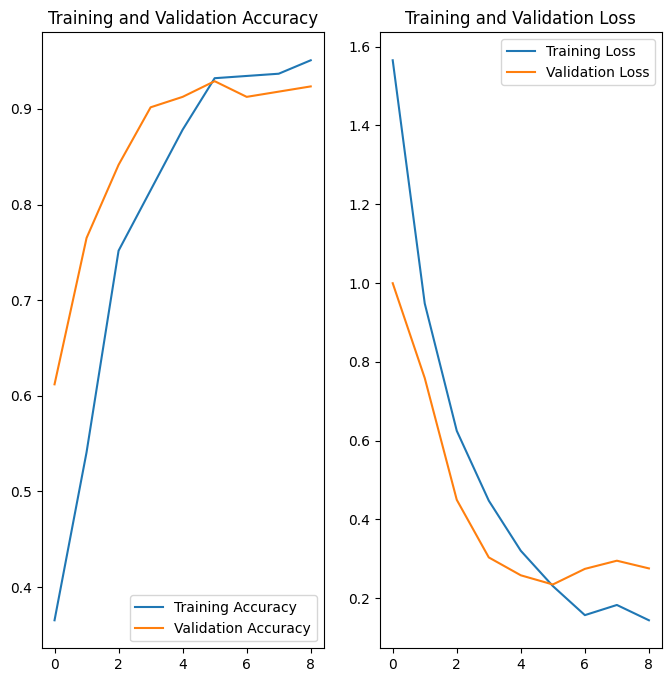

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()